In [1]:
import matplotlib.pyplot as plt
import numpy as np

import efg
import week6

In [2]:
np.set_printoptions(precision=3)

In [3]:
# Each line in the following text represents a single node in the game tree.
# The format of the lines is <Acting Player> | <History> for non-terminal nodes
# and "Terminal" | <History> | <Utilities> for terminal nodes.

kuhn_poker = efg.KuhnPoker()
kuhn_poker.print_game_tree()

 Chance ()
   Player1 (('J', 'Q'),)
     Player2 (('J', 'Q'), 'Check')
       Terminal (('J', 'Q'), 'Check', 'Check') [-1.  1.]
       Player1 (('J', 'Q'), 'Check', 'Bet')
         Terminal (('J', 'Q'), 'Check', 'Bet', 'Call') [-2.  2.]
         Terminal (('J', 'Q'), 'Check', 'Bet', 'Fold') [-1.  1.]
     Player2 (('J', 'Q'), 'Bet')
       Terminal (('J', 'Q'), 'Bet', 'Call') [-2.  2.]
       Terminal (('J', 'Q'), 'Bet', 'Fold') [ 1. -1.]
   Player1 (('J', 'K'),)
     Player2 (('J', 'K'), 'Check')
       Terminal (('J', 'K'), 'Check', 'Check') [-1.  1.]
       Player1 (('J', 'K'), 'Check', 'Bet')
         Terminal (('J', 'K'), 'Check', 'Bet', 'Call') [-2.  2.]
         Terminal (('J', 'K'), 'Check', 'Bet', 'Fold') [-1.  1.]
     Player2 (('J', 'K'), 'Bet')
       Terminal (('J', 'K'), 'Bet', 'Call') [-2.  2.]
       Terminal (('J', 'K'), 'Bet', 'Fold') [ 1. -1.]
   Player1 (('Q', 'J'),)
     Player2 (('Q', 'J'), 'Check')
       Terminal (('Q', 'J'), 'Check', 'Check') [ 1. -1.]
       P

In [4]:
# Initialize strategies of all players (including the chance player)
strategies = efg.initialize_strategies(kuhn_poker.info_sets, 'uniform')
print('Strategy of Player 1:', strategies[efg.Player.Player1], sep='\n', end='\n\n')

player1_utility, player2_utility = week6.evaluate(kuhn_poker, strategies)
print(f'Utilities: {player1_utility:.3f}, {player2_utility:.3f}')

exploitability = week6.compute_exploitability(kuhn_poker, strategies)
print(f'Exploitability: {exploitability:.3f}')

Strategy of Player 1:
('J',):
  Check: 0.50000
  Bet: 0.50000
('J', 'Check', 'Bet'):
  Fold: 0.50000
  Call: 0.50000
('Q',):
  Check: 0.50000
  Bet: 0.50000
('Q', 'Check', 'Bet'):
  Fold: 0.50000
  Call: 0.50000
('K',):
  Check: 0.50000
  Bet: 0.50000
('K', 'Check', 'Bet'):
  Fold: 0.50000
  Call: 0.50000

Utilities: 0.125, -0.125
Exploitability: 0.458


In [5]:
# Initialize the game tree and policies from the policy averaging example presented in the lecture
averaging_example = efg.AveragingExample()
strategy1, strategy2 = efg.create_averaging_example_strategies()

# You can ignore the last two arguments, they are irrelevant for this example
avg_strategy = week6.compute_average_strategy(
    averaging_example, efg.Player.Player1, [strategy1, strategy2],
    chance_strategy=efg.Strategy(), weights=np.array([1, 1], np.float32)
)

print('Average strategy:', avg_strategy, sep='\n')

Average strategy:
():
  A: 0.50000
  B: 0.50000
('B', 'B'):
  A: 0.68000
  B: 0.32000


In [6]:
# Compute Player 1's best response against a uniform strategy of its opponent
best_response = week6.compute_best_response(kuhn_poker, efg.Player.Player1, strategies)

print('Best response strategy for Player 1:', best_response, sep='\n')

Best response strategy for Player 1:
('J', 'Check', 'Bet'):
  Fold: 1.00000
  Call: 0.00000
('Q', 'Check', 'Bet'):
  Call: 1.00000
  Fold: 0.00000
('K', 'Check', 'Bet'):
  Call: 1.00000
  Fold: 0.00000
('J',):
  Bet: 1.00000
  Check: 0.00000
('Q',):
  Bet: 1.00000
  Check: 0.00000
('K',):
  Check: 1.00000
  Bet: 0.00000


Final strategy for Player 1:
('J',):
  Check: 0.79708
  Bet: 0.20292
('J', 'Check', 'Bet'):
  Call: 0.00013
  Fold: 0.99987
('Q',):
  Check: 0.99900
  Bet: 0.00100
('Q', 'Check', 'Bet'):
  Call: 0.54923
  Fold: 0.45077
('K',):
  Check: 0.38325
  Bet: 0.61675
('K', 'Check', 'Bet'):
  Call: 0.99974
  Fold: 0.00026

Final strategy for Player 2:
('Q', 'Check'):
  Check: 0.99940
  Bet: 0.00060
('Q', 'Bet'):
  Call: 0.35246
  Fold: 0.64754
('K', 'Check'):
  Check: 0.00020
  Bet: 0.99980
('K', 'Bet'):
  Call: 0.99980
  Fold: 0.00020
('J', 'Check'):
  Check: 0.67513
  Bet: 0.32487
('J', 'Bet'):
  Call: 0.00020
  Fold: 0.99980

Utility of Player 1 and Player 2 when playing their final strategies: [-0.056  0.056]
Final exploitability value: 0.00415


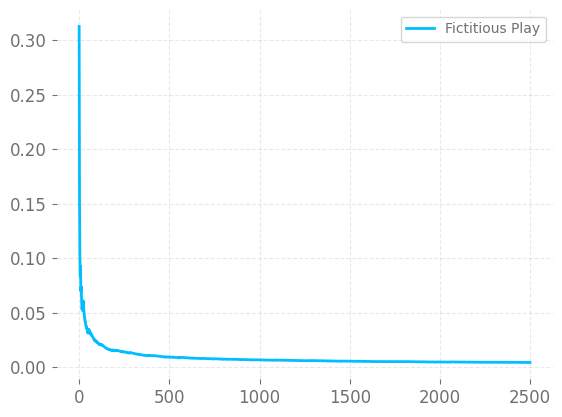

In [7]:
# In all examples, Fictitious Play is initialized using uniform strategies
# You can compare the final strategies with optimal strategies listed on Wikipedia
# https://en.wikipedia.org/wiki/Kuhn_poker

strategies = week6.fictitious_play(kuhn_poker, epochs=2500)
exploitability_values = week6.plot_exploitability(kuhn_poker, strategies, 'Fictitious Play')

print(f'Final exploitability value: {exploitability_values[-1]:.5f}')

plt.legend()
plt.show()

Final strategy for Player 1:
('K',):
  Check: 0.99850
  Bet: 0.00150
('K', 'Check', 'Bet'):
  Call: 0.51651
  Fold: 0.48349
('A',):
  Check: 0.99850
  Bet: 0.00150
('A', 'Check', 'Bet'):
  Call: 0.99975
  Fold: 0.00025

Final strategy for Player 2:
('K', 'Check'):
  Check: 0.50699
  Bet: 0.49301
('K', 'Bet'):
  Call: 0.00050
  Fold: 0.99950
('A', 'Check'):
  Check: 0.00050
  Bet: 0.99950
('A', 'Bet'):
  Call: 0.99950
  Fold: 0.00050

Utility of Player 1 and Player 2 when playing their final strategies: [-0.126  0.126]
Final exploitability value: 0.00347


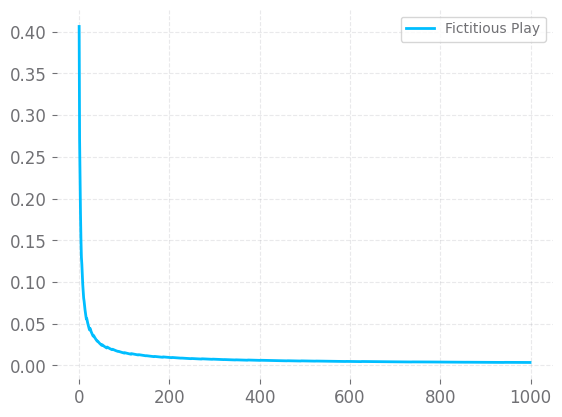

In [8]:
# This implements the Poker-like game tree presented in the lecture
lecture_poker = efg.LecturePoker()

strategies = week6.fictitious_play(lecture_poker, epochs=1000)
exploitability_values = week6.plot_exploitability(lecture_poker, strategies, 'Fictitious Play')

print(f'Final exploitability value: {exploitability_values[-1]:.5f}')

plt.legend()
plt.show()

Final strategy for Player 1:
():
  R: 0.87492
  P: 0.09448
  S: 0.03061

Final strategy for Player 2:
('R',):
  R: 0.00067
  P: 0.99867
  S: 0.00067
('P',):
  R: 0.00067
  P: 0.00067
  S: 0.99867
('S',):
  R: 0.99867
  P: 0.00067
  S: 0.00067

Utility of Player 1 and Player 2 when playing their final strategies: [-0.998  0.998]
Final exploitability value: 0.00100


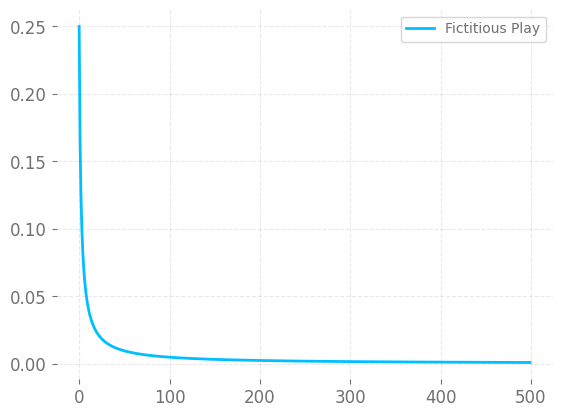

In [9]:
# This is a sequential version of Rock Paper Scissors where
# the second player *can* observe actions of the first player
rock_paper_scissors = efg.RockPaperScissors()

strategies = week6.fictitious_play(rock_paper_scissors, epochs=500)
exploitability_values = week6.plot_exploitability(rock_paper_scissors, strategies, 'Fictitious Play')

print(f'Final exploitability value: {exploitability_values[-1]:.5f}')

plt.legend()
plt.show()